### Download the dataset

In [2]:
# Name: Salary_Data.csv
# Location: https://mitu.co.in/dataset

### Import the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the dataset

In [6]:
df = pd.read_csv('Salary_Data.csv')

In [7]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Visualize

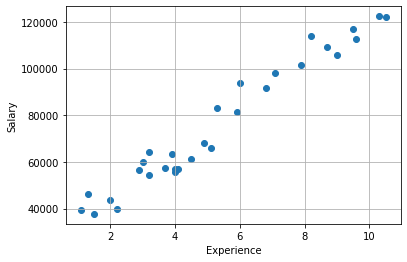

In [9]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(df['YearsExperience'], df['Salary'])

### Seperate the input and output data

In [11]:
x = df['YearsExperience'].values
y = df['Salary']

In [12]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [13]:
x = x.reshape(30,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### Cross validation

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [20]:
x_train.shape

(22, 1)

In [21]:
x_test.shape

(8, 1)

### Build the regression model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

In [25]:
regressor.fit(x_train, y_train)

LinearRegression()

### Prediction on unseen data / test data

In [28]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ]])

In [27]:
y_pred = regressor.predict(x_test)

In [29]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [30]:
result

,actual,predicted
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


### Evaluation: mean absolute error

In [34]:
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [36]:
# Accuracy / r2 score / linearity score
regressor.score(x, y) * 100

95.5975487542377

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

5.7545126467796965

### Line of best fit

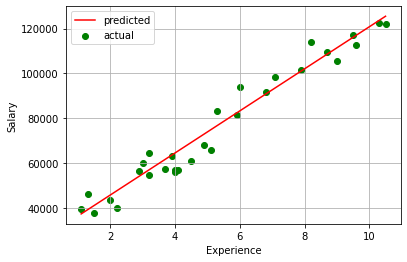

In [42]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color='green', label = 'actual')
plt.plot(x, regressor.predict(x), color='red', label='predicted')
plt.legend()

In [43]:
regressor.predict([[12]])

array([139543.21722009])

In [44]:
regressor.predict([[15]])

array([167682.34869593])

In [45]:
regressor.predict([[20]])

array([214580.90115566])

In [46]:
# Slope
regressor.coef_

array([9379.71049195])

In [47]:
regressor.intercept_

26986.691316737248

In [48]:
9379.71049195 * 20 + 26986.691316737248

214580.90115573723